In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generating the XOR Dataset
		according to the tensorflow playground website
	

In [2]:
def custom_xor(x,y):
	if x*y >= 0:
		return 1
	else:
		return -1
def pad_data(x):
	p = 0.3
	if x>0:
		return x+p
	else:
		return x-p
def rand_uniform(a,b):
	r = np.random.rand()
	r = r*(b-a)+a
	return r
def generate_xor_dataset(numsamples,noise=0):
	data = []
	padding = 0.3
	for i in range(numsamples):
		x = rand_uniform(-5,5)
		y = rand_uniform(-5,5)
		x = pad_data(x)
		y = pad_data(y)
		noiseX = rand_uniform(-1,1)*noise
		noiseY = rand_uniform(-1,1)*noise
		# x,y = x+noiseX,y+noiseY
		label = custom_xor(x+noiseX,y+noiseY)
		data.append([x,y,label])
	# data = np.array(data)
	return data
		

In [3]:
data_0 = generate_xor_dataset(400)

In [4]:
def plot_data(data):#Function to plot data with 2 features and 2 labels
	data = np.array(data)
	X = data[:,:2]
	y = data[:,2]
	colors = ['blue' if label == 1 else 'orange' for label in y]
	plt.scatter(X[:,0],X[:,1], c = colors,marker='.')
	plt.axhline(0, color='gray', linewidth=1, linestyle='-')  # X-axis line at y=0
	plt.axvline(0, color='gray', linewidth=1, linestyle='-')  # Y-axis line at x=0
	plt.show()

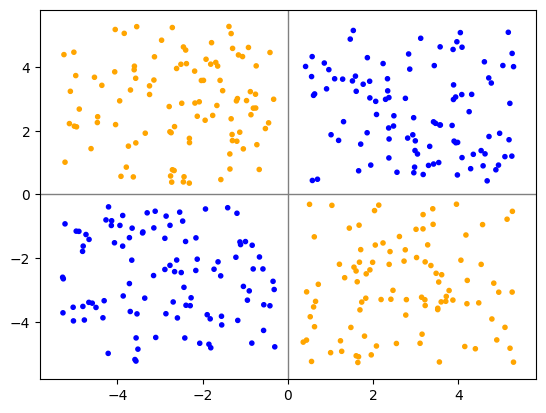

In [5]:
plot_data(data_0)

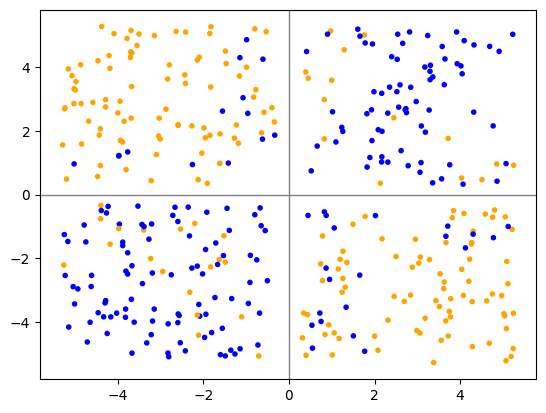

In [6]:
data_05 = generate_xor_dataset(400,3)
plot_data(data_05)

In [7]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [8]:
# Data Generation
data = generate_xor_dataset(4000)  # 200 train + 200 test
data = np.array(data)
X, y = data[:, :2], data[:, 2]
y = (y > 0).astype(int)  # Convert labels to binary (1 for positive, 0 for negative)

# Split data into training, validation, and test sets manually
def split_data(X, y, train_size=0.6, val_size=0.2):
	total_samples = len(X)
	train_end = int(train_size * total_samples)
	val_end = int((train_size + val_size) * total_samples)

	X_train, y_train = torch.tensor(X[:train_end], dtype=torch.float32), torch.tensor(y[:train_end], dtype=torch.float32)
	X_val, y_val = torch.tensor(X[train_end:val_end], dtype=torch.float32), torch.tensor(y[train_end:val_end], dtype=torch.float32)
	X_test, y_test = torch.tensor(X[val_end:], dtype=torch.float32), torch.tensor(y[val_end:], dtype=torch.float32)

	return X_train, y_train, X_val, y_val, X_test, y_test

X_train, y_train, X_val, y_val, X_test, y_test = split_data(X, y)

# Function to plot decision boundaries
def plot_decision_boundary(model, X, y, title):
	x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
	y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
	xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
						 np.arange(y_min, y_max, 0.1))
	grid = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)
	Z = model(grid).detach().numpy().reshape(xx.shape)
	plt.contourf(xx, yy, Z, alpha=0.8)
	plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
	plt.title(title)
	plt.show()

# Define MLP Model with optional L1 and L2 regularization
class MLP(nn.Module):
	def __init__(self, l1=0, l2=0):
		super(MLP, self).__init__()
		self.fc1 = nn.Linear(2, 10)
		self.fc2 = nn.Linear(10, 10)
		self.fc3 = nn.Linear(10, 1)
		self.l1 = l1
		self.l2 = l2

	def forward(self, x):
		x = torch.relu(self.fc1(x))
		x = torch.relu(self.fc2(x))
		x = torch.sigmoid(self.fc3(x))
		return x

	def regularization_loss(self):
		l1_loss = self.l1 * (torch.norm(self.fc1.weight, 1) + torch.norm(self.fc2.weight, 1) + torch.norm(self.fc3.weight, 1))
		l2_loss = self.l2 * (torch.norm(self.fc1.weight, 2) + torch.norm(self.fc2.weight, 2) + torch.norm(self.fc3.weight, 2))
		return l1_loss + l2_loss


In [9]:
# Training function
def train_model(model, X_train, y_train, X_val, y_val, epochs=400):
	optimizer = optim.Adam(model.parameters(), lr=0.01)
	criterion = nn.BCELoss()

	for epoch in range(epochs):
		model.train()
		optimizer.zero_grad()
		output = model(X_train).squeeze()
		loss = criterion(output, y_train) + model.regularization_loss()
		loss.backward()
		optimizer.step()

		if epoch % 10 == 0:
			model.eval()
			val_output = model(X_val).squeeze()
			val_loss = criterion(val_output, y_val)
			print(f'Epoch {epoch}, Loss: {loss.item()}, Val Loss: {val_loss.item()}')



Epoch 0, Loss: 0.7165340185165405, Val Loss: 0.6935091614723206
Epoch 10, Loss: 0.5953587889671326, Val Loss: 0.5954725742340088
Epoch 20, Loss: 0.452796995639801, Val Loss: 0.44102317094802856
Epoch 30, Loss: 0.3028578758239746, Val Loss: 0.289106160402298
Epoch 40, Loss: 0.19415928423404694, Val Loss: 0.18009042739868164
Epoch 50, Loss: 0.10746379941701889, Val Loss: 0.09443630278110504
Epoch 60, Loss: 0.04925321415066719, Val Loss: 0.04102452099323273
Epoch 70, Loss: 0.025587720796465874, Val Loss: 0.02047570049762726
Epoch 80, Loss: 0.015826847404241562, Val Loss: 0.012308415956795216
Epoch 90, Loss: 0.011071846820414066, Val Loss: 0.008406508713960648
Epoch 100, Loss: 0.008382133208215237, Val Loss: 0.006220312789082527
Epoch 110, Loss: 0.006675610318779945, Val Loss: 0.00487502058967948
Epoch 120, Loss: 0.005503428168594837, Val Loss: 0.003972313832491636
Epoch 130, Loss: 0.0046484339982271194, Val Loss: 0.003314661793410778
Epoch 140, Loss: 0.003995741717517376, Val Loss: 0.0028

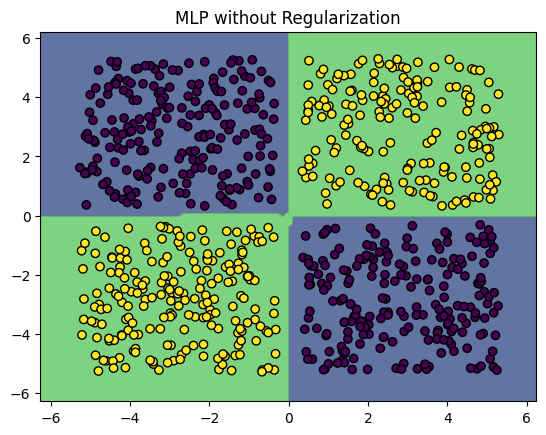

In [10]:
# MLP without Regularization
model_mlp = MLP()
train_model(model_mlp, X_train, y_train, X_val, y_val)
plot_decision_boundary(lambda x: model_mlp(x).squeeze() > 0.5, X_test, y_test, "MLP without Regularization")


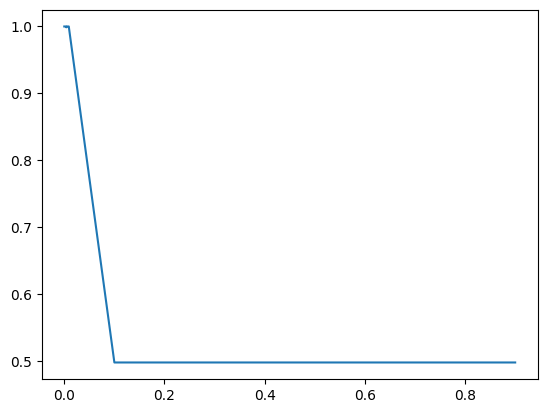

Best Penalty Coefficient: 0.0,	 Best Validation Accuracy: 1.0000



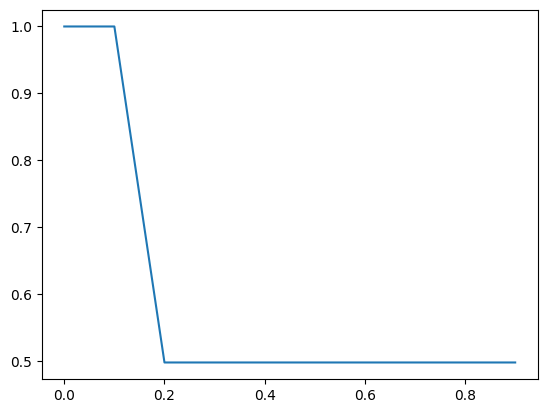

Best Penalty Coefficient: 0.0,	 Best Validation Accuracy: 1.0000


In [11]:
def evaluate_model(model, X_val, y_val):
	model.eval()
	with torch.no_grad():
		predictions = (model(X_val).squeeze() > 0.5).float()
		accuracy = (predictions == y_val).float().mean().item()
	return accuracy

# Function to train the model with a given L1 or L2 penalty coefficient
def train_with_penalty(X_train, y_train, X_val, y_val, penalty_coefficient, l1=False, l2=False, epochs=400):
	if l1:
		model = MLP(l1=penalty_coefficient)
	elif l2:
		model = MLP(l2=penalty_coefficient)
	
	optimizer = optim.Adam(model.parameters(), lr=0.01)
	criterion = nn.BCELoss()

	for epoch in range(epochs):
		model.train()
		optimizer.zero_grad()
		output = model(X_train).squeeze()
		loss = criterion(output, y_train) + model.regularization_loss()
		loss.backward()
		optimizer.step()
	
	# Evaluate on validation data
	accuracy = evaluate_model(model, X_val, y_val)
	return accuracy, model

# Grid Search for Best L1/L2 Penalty Coefficient
def find_best_penalty(X_train, y_train, X_val, y_val, penalty_range, l1=False, l2=False):
	best_accuracy = 0.0
	best_coefficient = None
	best_model = None
	penalties = []
	accs = []

	for coefficient in penalty_range:
		accuracy, model = train_with_penalty(X_train, y_train, X_val, y_val, coefficient, l1=l1, l2=l2)
		# print(f"Penalty Coefficient: {coefficient},\t Validation Accuracy: {accuracy:.4f}")
		penalties.append(coefficient)
		accs.append(accuracy)
		
		if accuracy > best_accuracy:
			best_accuracy = accuracy
			best_coefficient = coefficient
			best_model = model
	plt.plot(penalties, accs, label = "penality vs Validation accuracy")
	plt.show()

	print(f"Best Penalty Coefficient: {best_coefficient},\t Best Validation Accuracy: {best_accuracy:.4f}")
	return best_coefficient, best_model

# Define a range of penalty coefficients to test
penalty_range = list(np.arange(0, 1,0.1))+list(np.arange(0.001,0.01,0.001))
# penalty_range = np.arange(0.001,0.01,0.001)
penalty_range.sort()
# Find the best L1 penalty coefficient
best_l1_penalty, best_l1_model = find_best_penalty(X_train, y_train, X_val, y_val, penalty_range, l1=True)
print()
# print()
# Find the best L2 penalty coefficient
best_l2_penalty, best_l2_model = find_best_penalty(X_train, y_train, X_val, y_val, penalty_range, l2=True)

Epoch 0, Loss: 0.7287494540214539, Val Loss: 0.7069134712219238
Epoch 10, Loss: 0.6326023936271667, Val Loss: 0.6102062463760376
Epoch 20, Loss: 0.535999596118927, Val Loss: 0.5078615546226501
Epoch 30, Loss: 0.39323103427886963, Val Loss: 0.3613109290599823
Epoch 40, Loss: 0.2156268060207367, Val Loss: 0.18490514159202576
Epoch 50, Loss: 0.09532690048217773, Val Loss: 0.07776789367198944
Epoch 60, Loss: 0.044921793043613434, Val Loss: 0.03589453175663948
Epoch 70, Loss: 0.026345491409301758, Val Loss: 0.02072947286069393
Epoch 80, Loss: 0.017911992967128754, Val Loss: 0.014071697369217873
Epoch 90, Loss: 0.013348611071705818, Val Loss: 0.010528880171477795
Epoch 100, Loss: 0.010553955100476742, Val Loss: 0.008394259959459305
Epoch 110, Loss: 0.00866722222417593, Val Loss: 0.0069441054947674274
Epoch 120, Loss: 0.007299293763935566, Val Loss: 0.005887725856155157
Epoch 130, Loss: 0.0062605347484350204, Val Loss: 0.005080218426883221
Epoch 140, Loss: 0.005444781389087439, Val Loss: 0.00

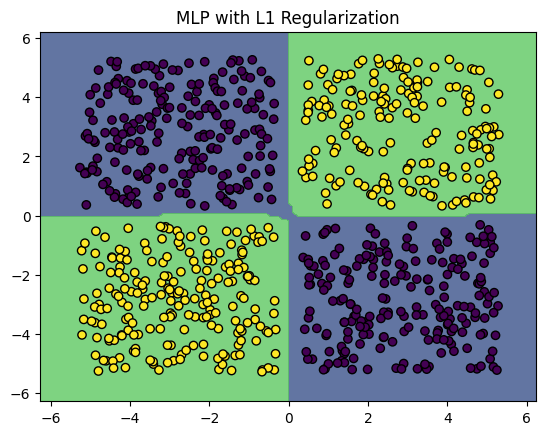

In [12]:
# MLP with L1 Regularization
# best_l1_penalty = 0.01
model_l1 = MLP(l1=best_l1_penalty)
train_model(model_l1, X_train, y_train, X_val, y_val)
plot_decision_boundary(lambda x: model_l1(x).squeeze() > 0.5, X_test, y_test, "MLP with L1 Regularization")



Epoch 0, Loss: 0.8196264505386353, Val Loss: 0.7824164628982544
Epoch 10, Loss: 0.5763698816299438, Val Loss: 0.5635489225387573
Epoch 20, Loss: 0.39045098423957825, Val Loss: 0.3730219900608063
Epoch 30, Loss: 0.21549980342388153, Val Loss: 0.19925928115844727
Epoch 40, Loss: 0.10716564208269119, Val Loss: 0.09685757011175156
Epoch 50, Loss: 0.05704842135310173, Val Loss: 0.05075089633464813
Epoch 60, Loss: 0.034778378903865814, Val Loss: 0.030762895941734314
Epoch 70, Loss: 0.02367016114294529, Val Loss: 0.02078218385577202
Epoch 80, Loss: 0.017401104792952538, Val Loss: 0.015133035369217396
Epoch 90, Loss: 0.013507910072803497, Val Loss: 0.011678176932036877
Epoch 100, Loss: 0.010897792875766754, Val Loss: 0.00934953335672617
Epoch 110, Loss: 0.009020625613629818, Val Loss: 0.007690597325563431
Epoch 120, Loss: 0.007608333602547646, Val Loss: 0.006463747471570969
Epoch 130, Loss: 0.006513663567602634, Val Loss: 0.005517023149877787
Epoch 140, Loss: 0.005645418539643288, Val Loss: 0.

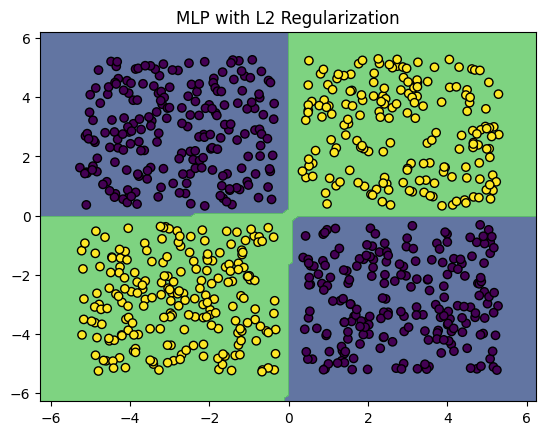

In [13]:
# MLP with L2 Regularization
# best_l2_penalty = 0.01 
model_l2 = MLP(l2=best_l2_penalty)
train_model(model_l2, X_train, y_train, X_val, y_val)
plot_decision_boundary(lambda x: model_l2(x).squeeze() > 0.5, X_test, y_test, "MLP with L2 Regularization")



Epoch 0, Loss: 1.8818717002868652
Epoch 50, Loss: 0.11768534034490585
Epoch 100, Loss: 0.09928779304027557
Epoch 150, Loss: 0.08782993257045746
Epoch 200, Loss: 0.07973773777484894
Epoch 250, Loss: 0.07361025363206863
Epoch 300, Loss: 0.0687514990568161
Epoch 350, Loss: 0.06477014720439911


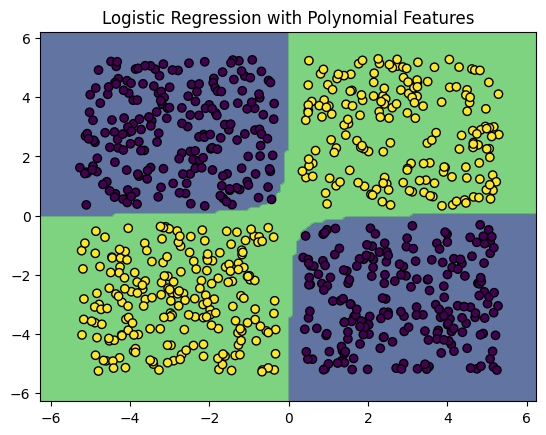

In [14]:
class LogisticRegressionModel(nn.Module):
	def __init__(self, input_dim):
		super(LogisticRegressionModel, self).__init__()
		self.linear = nn.Linear(input_dim, 1)

	def forward(self, x):
		return torch.sigmoid(self.linear(x))

# Manual polynomial feature expansion
def polynomial_features(X, degree=2):
	poly_features = [X]  # Start with original features

	for d in range(2, degree + 1):
		for i in range(d + 1):
			feature = (X[:, 0]**(d - i)) * (X[:, 1]**i)
			poly_features.append(feature.view(-1, 1))  # Reshape to [240, 1]

	return torch.cat(poly_features, dim=1)  # Concatenate along the second dimension

X_poly_train = polynomial_features(X_train, degree=2)
X_poly_test = polynomial_features(X_test, degree=2)

log_reg = LogisticRegressionModel(X_poly_train.shape[1])
optimizer = optim.SGD(log_reg.parameters(), lr=0.01)
criterion = nn.BCELoss()

# Training Logistic Regression
for epoch in range(400):
	log_reg.train()
	optimizer.zero_grad()
	output = log_reg(X_poly_train).squeeze()
	loss = criterion(output, y_train)
	loss.backward()
	optimizer.step()
	if epoch % 50 == 0:
		print(f'Epoch {epoch}, Loss: {loss.item()}')

# Plot decision boundary for Logistic Regression with polynomial features
plot_decision_boundary(lambda x: log_reg(polynomial_features(x)).squeeze() > 0.5, X_test, y_test, "Logistic Regression with Polynomial Features")

Polynomial trains faster, so for less no of epochs, polynomial is better


Model: MLP without Regularization
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.0
Confusion Matrix:
[[414   0]
 [  0 386]]


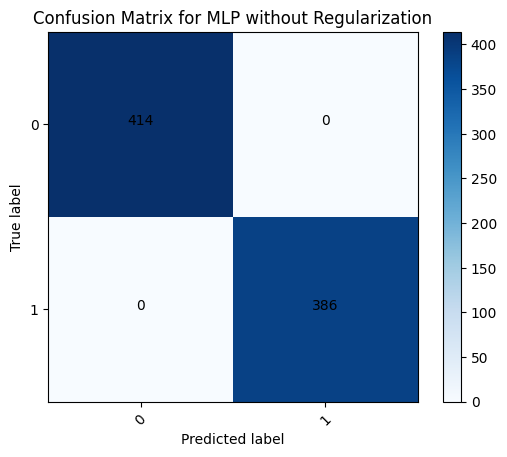


Model: MLP with L1 Regularization
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.0
Confusion Matrix:
[[414   0]
 [  0 386]]


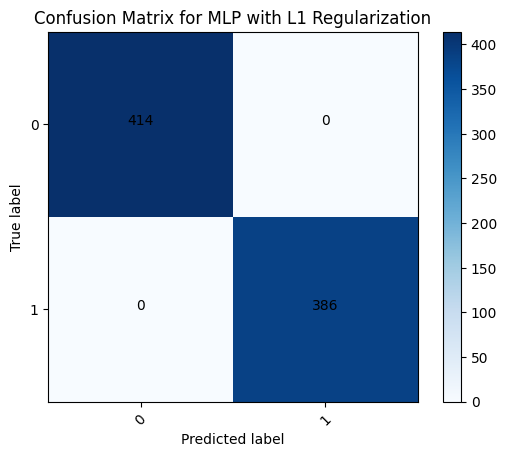


Model: MLP with L2 Regularization
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.0
Confusion Matrix:
[[414   0]
 [  0 386]]


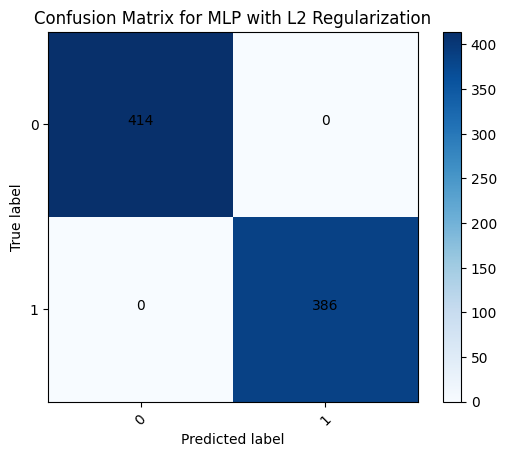


Model: Logistic Regression with Polynomial Features
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.0
Confusion Matrix:
[[414   0]
 [  0 386]]


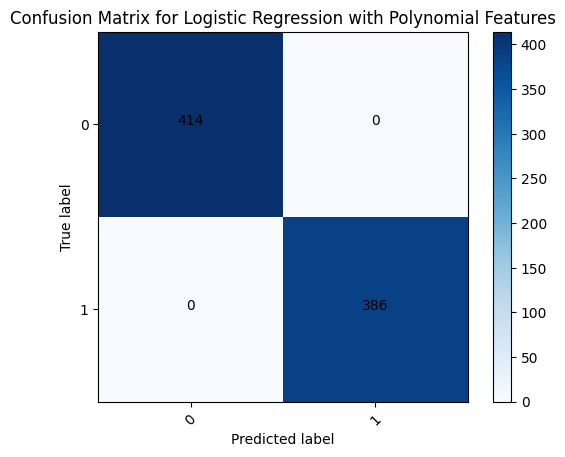

In [15]:
# Function to compute metrics: accuracy, precision, recall, and confusion matrix
# Compute metrics function, updated to handle polynomial features for Logistic Regression
def compute_metrics(model, X, y, poly_features=False):
	model.eval()
	with torch.no_grad():
		# If polynomial features are needed, expand X
		if poly_features:
			X = polynomial_features(X, degree=2)
		
		# Predict
		predictions = (model(X).squeeze() > 0.5).float()
		
		# Calculate confusion matrix components
		tp = ((predictions == 1) & (y == 1)).sum().item()  # True Positive
		tn = ((predictions == 0) & (y == 0)).sum().item()  # True Negative
		fp = ((predictions == 1) & (y == 0)).sum().item()  # False Positive
		fn = ((predictions == 0) & (y == 1)).sum().item()  # False Negative

		# Calculate accuracy, precision, recall
		accuracy = (tp + tn) / (tp + tn + fp + fn)
		precision = tp / (tp + fp) if (tp + fp) > 0 else 0
		recall = tp / (tp + fn) if (tp + fn) > 0 else 0
		f1_score = (2*tp)/((2*tp)+fn+fp)

		# Create confusion matrix
		confusion_matrix = np.array([[tn, fp], [fn, tp]])

	return accuracy, precision, recall,f1_score, confusion_matrix


# Function to plot confusion matrix
def plot_confusion_matrix(confusion_matrix, title):
	plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues)
	plt.title(title)
	plt.colorbar()
	tick_marks = np.arange(2)
	plt.xticks(tick_marks, ["0", "1"], rotation=45)
	plt.yticks(tick_marks, ["0", "1"])

	plt.xlabel("Predicted label")
	plt.ylabel("True label")

	# Adding values to the confusion matrix plot
	for i in range(2):
		for j in range(2):
			plt.text(j, i, f"{confusion_matrix[i, j]}", horizontalalignment="center")

	plt.show()

# Evaluate and print metrics for each model
models = {
	"MLP without Regularization": model_mlp,
	"MLP with L1 Regularization": model_l1,
	"MLP with L2 Regularization": model_l2,
	"Logistic Regression with Polynomial Features": log_reg
}

for name, model in models.items():
	if "Logistic Regression" in name:
		accuracy, precision, recall,f1_score, confusion_matrix = compute_metrics(model, X_test, y_test, poly_features=True)
	else:
		accuracy, precision, recall,f1_score, confusion_matrix = compute_metrics(model, X_test, y_test)

	print(f"\nModel: {name}")
	print(f"Accuracy: {accuracy:.2f}")
	print(f"Precision: {precision:.2f}")
	print(f"Recall: {recall:.2f}")
	print(f"F1 Score: {f1_score}")
	print("Confusion Matrix:")
	print(confusion_matrix)
	
	# Plot confusion matrix
	plot_confusion_matrix(confusion_matrix, title=f"Confusion Matrix for {name}")
